# Geospatial Data in Python: Database, Desktop, and the Web
## Tutorial (Part 1)

# Converting coordinates with PyProj

In [1]:
from pyproj import Proj

# Create projection transformation object
p = Proj(init='epsg:3857') # EPSG code for Web Mercator

# Convert from long/lat to Mercator and back
print(p(-97.740372, 30.282642))
print(p(-10880408.440985134, 3539932.8204972977, inverse=True))

(-10880408.440985134, 3539932.820497298)
(-97.740372, 30.282642000000003)


In [2]:
# Fiona (which we will be using shortly) has several 
# helper functions for working with proj4 strings
from fiona.crs import to_string, from_epsg, from_string

# Create a crs dict from a proj4 string
crs = from_string('+proj=lcc +lat_1=41.03333333333333 +lat_2=40.66666666666666 '
                  '+lat_0=40.16666666666666 +lon_0=-74 +x_0=300000.0000000001 '
                  '+y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=us-ft +no_defs')

# Using a proj4 string
nyc_proj = Proj(crs, preserve_units=True)

# Using an EPSG code
nyc_epsg = Proj(init='epsg:2263', preserve_units=True)

In [3]:
# Here's about where my office in NYC is located (in long/lat)
office = (-73.9637, 40.7684)

# Are they close?
print(nyc_proj(*office))
print(nyc_epsg(*office))

(994304.9668873836, 219227.69171753718)
(994304.9668873836, 219227.69171753718)


## Plotting Eyjafjallajökull volcano with Cartopy

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt

# Create a MapQuest open aerial instance
map_quest_aerial = cimgt.MapQuestOpenAerial()

stamen_terrain = cimgt.StamenTerrain()

# What is the projection?
print(map_quest_aerial.crs.proj4_init)

+a=6378137.0 +b=6378137.0 +nadgrids=@null +proj=merc +lon_0=0.0 +lat_ts=0.0 +units=m +no_defs


In [5]:
# Specify the lon/lat for the volcano
volcano = (-19.613333, 63.62)

# Define the plotting extent of the map
extent = [-22, -15, 63, 65]

# Specify the transform to use when plotting
transform=ccrs.Geodetic()

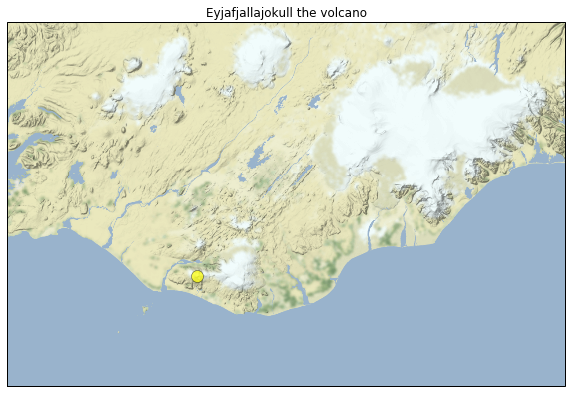

In [10]:
fig = plt.figure(figsize=(10,8))
# Create a GeoAxes in the tile's projection
ax = plt.axes(projection=map_quest_aerial.crs)
ax.set_extent(extent)
# Add the MapQuest data at zoom level 8
#ax.add_image(map_quest_aerial, 8)
ax.add_image(stamen_terrain, 8)
ax.plot(*volcano, marker='o', color='yellow', markersize=12,
        alpha=0.7, transform=transform)
ax.set_title(u'Eyjafjallajokull the volcano')
plt.show()

### Time to work on Notebook:

[`Working with Projections in Python`](../exercises/Working with Projections in Python.ipynb)